In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import joblib
from pathlib import Path

In [2]:
results_directory = Path('./precomputed_results')

In [3]:
n_units = 24
methods = ['pomegranate_cpu', 'pomegranate_gpu', 'pgmax_cpu', 'pgmax_gpu', 'pgmpy']
inference_times = {
    method: [] for method in methods
}
hamming_distances = {
    method: [] for method in methods
}
pgmax_has_lowest_error = 0
pgmax_has_lowest_energy = 0
for rbm_idx in range(50):
    errors_for_rbm = {}
    energies_for_rbm = {}
    for method in methods:
        fname = results_directory / f'n_units_{n_units}_rbm_idx_{rbm_idx}_{method}.joblib'
        results = joblib.load(fname)
        inference_times[method].append(results['inference_time'])
        hamming_distances[method].append(results['error'])
        errors_for_rbm[method] = results['error']
        energies_for_rbm[method] = results['energy']

    flag = True
    for key in errors_for_rbm:
        if errors_for_rbm['pgmax_gpu'] > errors_for_rbm[key] and errors_for_rbm['pgmax_cpu'] > errors_for_rbm[key]:
            flag = False

    if flag:
        pgmax_has_lowest_error += 1
        
    flag = True
    for key in energies_for_rbm:
        if energies_for_rbm['pgmax_gpu'] > energies_for_rbm[key] and energies_for_rbm['pgmax_cpu'] > energies_for_rbm[key]:
            flag = False

    if flag:
        pgmax_has_lowest_energy += 1

print(f'PGMax achieves the lowest error for {pgmax_has_lowest_error}/50 {n_units}-unit RBMs')
print(f'PGMax achieves the lowest energy for {pgmax_has_lowest_energy}/50 {n_units}-unit RBMs')
for method in methods:
    mean_time = np.mean(inference_times[method])
    ste_time = np.std(inference_times[method]) / np.sqrt(len(inference_times[method]))
    print(f'Average inference time for {method} on {n_units}-unit RBMs: {mean_time:.2f} (±{ste_time:.2f})')
    mean_error = np.mean(hamming_distances[method])
    ste_error = np.std(hamming_distances[method]) / np.sqrt(len(hamming_distances[method]))
    print(f'Average hamming distance from optimal solution for {method} on {n_units}-unit RBMs: {mean_error:.2f} (±{ste_error:.2f})')
    print(f'{method} recovers the optimal solution for {np.sum(np.array(hamming_distances[method]) == 0)}/50 {n_units}-unit RBMs')

PGMax achieves the lowest error for 46/50 24-unit RBMs
PGMax achieves the lowest energy for 44/50 24-unit RBMs
Average inference time for pomegranate_cpu on 24-unit RBMs: 0.32 (±0.01)
Average hamming distance from optimal solution for pomegranate_cpu on 24-unit RBMs: 2.20 (±0.25)
pomegranate_cpu recovers the optimal solution for 12/50 24-unit RBMs
Average inference time for pomegranate_gpu on 24-unit RBMs: 0.70 (±0.02)
Average hamming distance from optimal solution for pomegranate_gpu on 24-unit RBMs: 2.20 (±0.25)
pomegranate_gpu recovers the optimal solution for 12/50 24-unit RBMs
Average inference time for pgmax_cpu on 24-unit RBMs: 0.25 (±0.00)
Average hamming distance from optimal solution for pgmax_cpu on 24-unit RBMs: 1.66 (±0.29)
pgmax_cpu recovers the optimal solution for 21/50 24-unit RBMs
Average inference time for pgmax_gpu on 24-unit RBMs: 0.19 (±0.01)
Average hamming distance from optimal solution for pgmax_gpu on 24-unit RBMs: 1.66 (±0.29)
pgmax_gpu recovers the optimal s

In [4]:
for method in ['pomegranate_cpu', 'pgmpy']:
    for baseline in ['pgmax_cpu', 'pgmax_gpu']:
        print(f'{method} is {np.mean(inference_times[method]) / np.mean(inference_times[baseline]):.2f}x slower than {baseline}')

pomegranate_cpu is 1.29x slower than pgmax_cpu
pomegranate_cpu is 1.70x slower than pgmax_gpu
pgmpy is 16.68x slower than pgmax_cpu
pgmpy is 22.13x slower than pgmax_gpu


In [5]:
n_best = []
for n_units in list(range(40, 210, 20)):
    methods = ['pomegranate_cpu', 'pomegranate_gpu', 'pgmax_cpu', 'pgmax_gpu', 'pgmpy']
    inference_times = {
        method: [] for method in methods
    }
    energies = {
        method: [] for method in methods
    }
    pgmax_has_lowest_energy = 0
    for rbm_idx in range(20):
        energies_for_rbm = {}
        for method in methods:
            fname = results_directory / f'n_units_{n_units}_rbm_idx_{rbm_idx}_{method}.joblib'
            results = joblib.load(fname)
            inference_times[method].append(results['inference_time'])
            energies[method].append(results['energy'])
            energies_for_rbm[method] = results['energy']
            
        flag = True
        for key in energies_for_rbm:
            if energies_for_rbm['pgmax_gpu'] > energies_for_rbm[key] and energies_for_rbm['pgmax_cpu'] > energies_for_rbm[key]:
                flag = False
    
        if flag:
            pgmax_has_lowest_energy += 1
    
    print(f'PGMax achieves the lowest energy for {pgmax_has_lowest_energy}/20 {n_units}-unit RBMs')
    n_best.append(pgmax_has_lowest_energy)
    for method in methods:
        mean_time = np.mean(inference_times[method])
        ste_time = np.std(inference_times[method]) / np.sqrt(len(inference_times[method]))
        print(f'Average inference time for {method} on {n_units}-unit RBMs: {mean_time:.2f} (±{ste_time:.2f})')

print(f'PGMax on average achieves the lowest energy for {np.mean(n_best):.2f}/20 RBMs')

PGMax achieves the lowest energy for 18/20 40-unit RBMs
Average inference time for pomegranate_cpu on 40-unit RBMs: 1.32 (±0.06)
Average inference time for pomegranate_gpu on 40-unit RBMs: 3.03 (±0.14)
Average inference time for pgmax_cpu on 40-unit RBMs: 0.26 (±0.01)
Average inference time for pgmax_gpu on 40-unit RBMs: 0.21 (±0.02)
Average inference time for pgmpy on 40-unit RBMs: 9.85 (±1.08)
PGMax achieves the lowest energy for 15/20 60-unit RBMs
Average inference time for pomegranate_cpu on 60-unit RBMs: 4.12 (±0.12)
Average inference time for pomegranate_gpu on 60-unit RBMs: 10.18 (±0.30)
Average inference time for pgmax_cpu on 60-unit RBMs: 0.28 (±0.01)
Average inference time for pgmax_gpu on 60-unit RBMs: 0.20 (±0.02)
Average inference time for pgmpy on 60-unit RBMs: 15.93 (±1.36)
PGMax achieves the lowest energy for 17/20 80-unit RBMs
Average inference time for pomegranate_cpu on 80-unit RBMs: 8.06 (±0.28)
Average inference time for pomegranate_gpu on 80-unit RBMs: 20.92 (±0.7

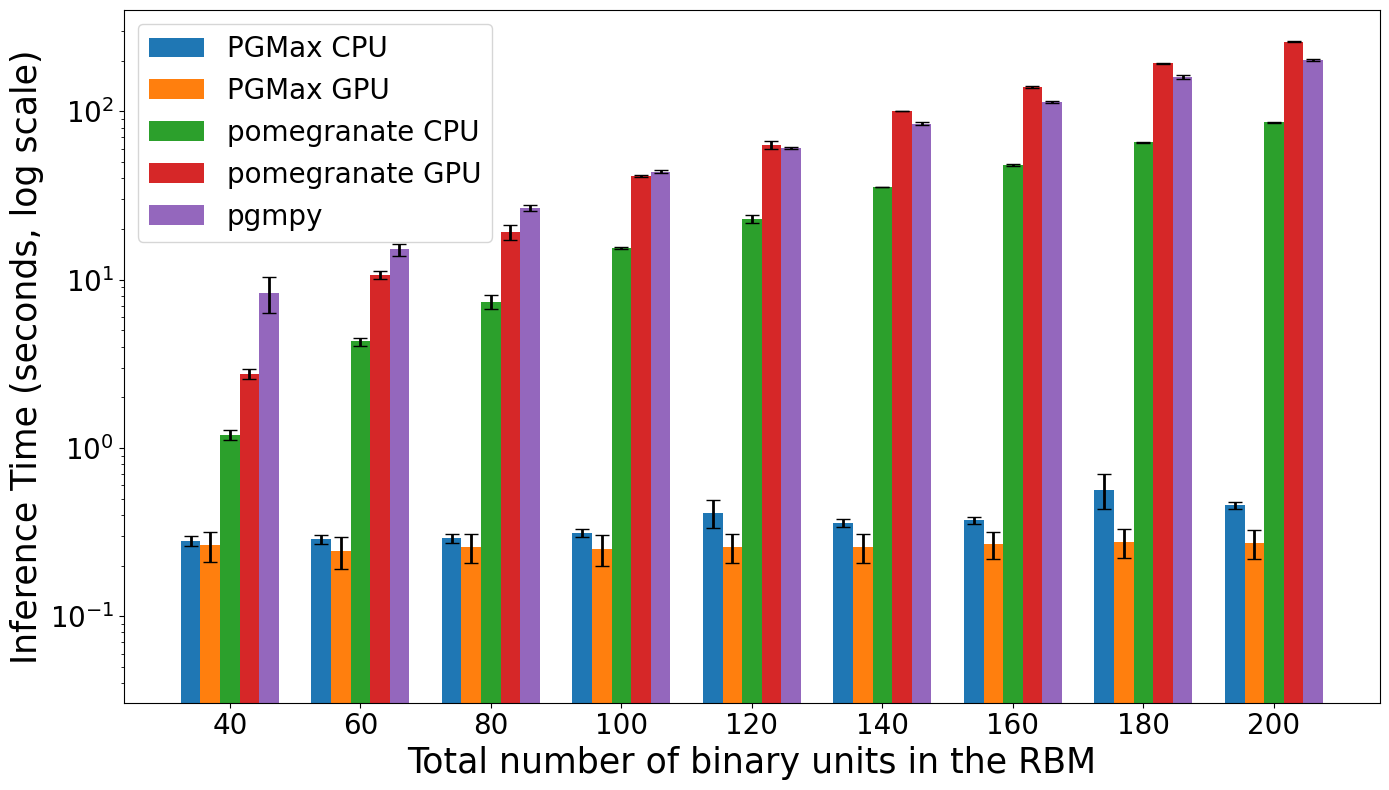

In [6]:
n_units_list = list(range(40, 210, 20))
methods = ['pgmax_cpu', 'pgmax_gpu', 'pomegranate_cpu', 'pomegranate_gpu', 'pgmpy']

mean_times = {method: [] for method in methods}
ste_times = {method: [] for method in methods}

for n_units in n_units_list:
    inference_times = {method: [] for method in methods}
    for rbm_idx in range(5):
        for method in methods:
            fname = results_directory / f'n_units_{n_units}_rbm_idx_{rbm_idx}_{method}.joblib'
            results = joblib.load(fname)
            inference_times[method].append(results['inference_time'])
    
    for method in methods:
        mean_time = np.mean(inference_times[method])
        ste_time = np.std(inference_times[method]) / np.sqrt(len(inference_times[method]))
        mean_times[method].append(mean_time)
        ste_times[method].append(ste_time)

x = np.arange(len(n_units_list))  # the label locations
width = 0.15  # the width of the bars to fit all 5 methods

fig, ax = plt.subplots(figsize=(14, 8))

# Plotting the bars with black error bars
rects1 = ax.bar(x - 2*width, mean_times['pgmax_cpu'], width, yerr=ste_times['pgmax_cpu'], label='PGMax CPU', log=True, capsize=5, error_kw=dict(elinewidth=2, ecolor='black'))
rects2 = ax.bar(x - width, mean_times['pgmax_gpu'], width, yerr=ste_times['pgmax_gpu'], label='PGMax GPU', log=True, capsize=5, error_kw=dict(elinewidth=2, ecolor='black'))
rects3 = ax.bar(x, mean_times['pomegranate_cpu'], width, yerr=ste_times['pomegranate_cpu'], label='pomegranate CPU', log=True, capsize=5, error_kw=dict(elinewidth=2, ecolor='black'))
rects4 = ax.bar(x + width, mean_times['pomegranate_gpu'], width, yerr=ste_times['pomegranate_gpu'], label='pomegranate GPU', log=True, capsize=5, error_kw=dict(elinewidth=2, ecolor='black'))
rects5 = ax.bar(x + 2*width, mean_times['pgmpy'], width, yerr=ste_times['pgmpy'], label='pgmpy', log=True, capsize=5, error_kw=dict(elinewidth=2, ecolor='black'))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Total number of binary units in the RBM', fontsize=25)
ax.set_ylabel('Inference Time (seconds, log scale)', fontsize=25)
# ax.set_title('Inference Times by Method and Number of Units', fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(n_units_list, fontsize=20)
ax.legend(fontsize=20)
ax.tick_params(axis='y', labelsize=20)

fig.tight_layout()

plt.show()
fig.savefig('results.pdf', dpi=300)